In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sy

In [3]:
def model(t, state, Me, y, k, w, j, f, Ae, Ap, a, h, b, z, g, V, vmax, Km):
    """function to establish the system in the model
    
       Parameters:
       - state (ndarray): array of dependent variables (P, Pb, Pa, Pu, E, Em, Ea, Eu, M)
       - t (float): time
       - others (float): parameters for the equations (will be given values as we find them)

       Returns:
       - array: vector of derivatives at time t
    """
    # unpack the variables (for readability)
    P, Pb, Pa, Pu, E, Em, Ea, Eu, M = state
    
    # set up the equations
    dy = [
        y - k*Me*P - (k/w)*M*P + j*Pb + f*(Ae/Ap)*E,                       # P
        k*Me*P + (k/w)*M*P - j*Pb - h*Pb,                                 # Pb
        h*Pb - a*Pa,                                                      # Pa
        a*Pa - g*Pu,                                                      # Pu
        g*(Ap/Ae)*Pu - f*E + b*Eu - (k/w)*E*M + j*Em,                      # E
        (k/w)*E*M - h*Em - j*Em,                                          # Em
        h*Em - a*Ea,                                                      # Ea
        -b*Eu + a*Ea - z*Eu,                                             # Eu
        -(k/w)*M*((Ap / V)*P + (Ae / V)*E) + (j + a)*((Ae / V)*Em + (Ap / V)*Pb) - vmax*M/(V*(Km + M))  # M 
        ]

    return dy


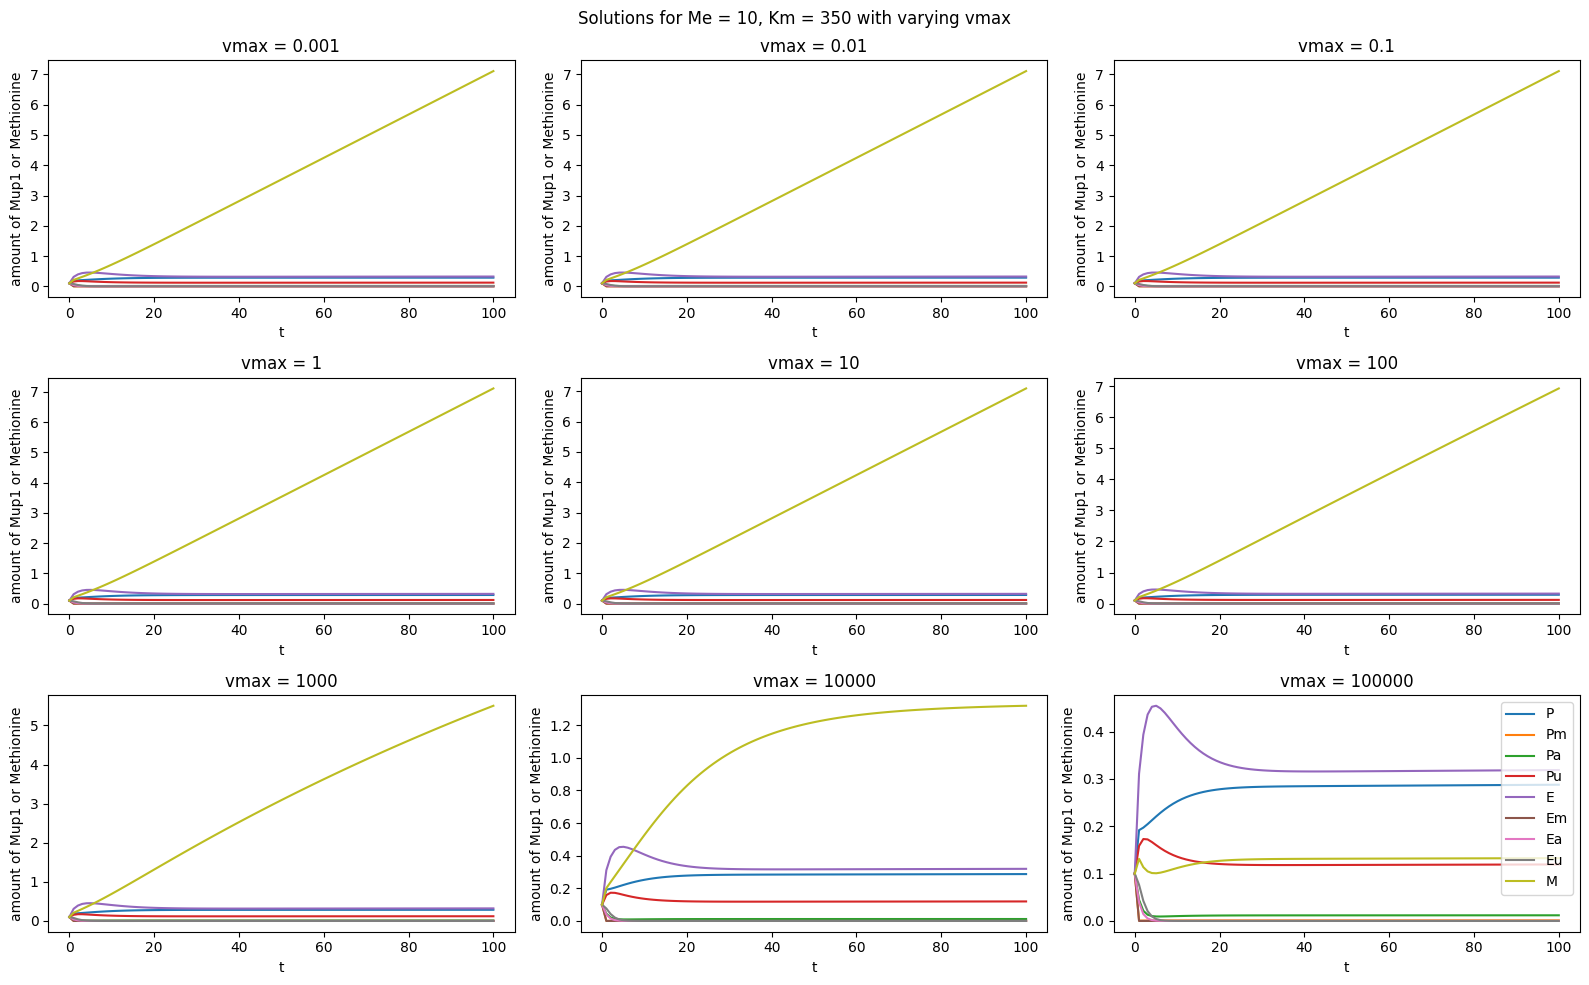

In [4]:
# set up figure and axis
fig, ax = plt.subplots(3, 3, figsize=(16, 10))

for j, vmax in enumerate([1*10**i for i in range(-3, 6)]): 
    # order: Me, y, k, w, j, f, Ae, Ap, a, h, b, z, g, V, vmax, Km
    params = [10, 8.3e-5, 100/2188, 32, 100, .25, 47, 314, 1, 10, 1, .002, .1, 523, vmax, 350]
    initial = [.1, .1, .1, .1, .1, .1, .1, .1, .1]
    t_span = (0, 100)
    t_eval = np.linspace(*t_span, 100)

    # solve with solve_ivp and plot
    sol = solve_ivp(model, t_span=t_span, y0=initial, t_eval=t_eval, args=params)
    P, Pm, Pa, Pu, E, Em, Ea, Eu, M = sol.y

    ax[j // 3][j % 3].plot(t_eval, P, label="P")
    ax[j // 3][j % 3].plot(t_eval, Pm, label="Pm")
    ax[j // 3][j % 3].plot(t_eval, Pa, label="Pa")
    ax[j // 3][j % 3].plot(t_eval, Pu, label="Pu")
    ax[j // 3][j % 3].plot(t_eval, E, label="E")
    ax[j // 3][j % 3].plot(t_eval, Em, label="Em")
    ax[j // 3][j % 3].plot(t_eval, Ea, label="Ea")
    ax[j // 3][j % 3].plot(t_eval, Eu, label="Eu")
    ax[j // 3][j % 3].plot(t_eval, M, label="M")

    ax[j // 3][j % 3].set_title(f"vmax = {vmax}")
    ax[j // 3][j % 3].set_xlabel("t")
    ax[j // 3][j % 3].set_ylabel("amount of Mup1 or Methionine")

plt.suptitle("Solutions for Me = 10, Km = 350 with varying vmax")
plt.tight_layout()
plt.legend()
# plt.savefig("Images/vmax_tests/vary_vmax_me_0.1.png")
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

# run smaller vmax values to steady state
for j, vmax in enumerate([0.001, 0.01, 0.1, 1, 10, 100]):
    # order: Me, y, k, w, j, f, Ae, Ap, a, h, b, z, g, V, vmax, Km
    params = [10, 8.3e-5, 100/2188, 32, 100, .25, 47, 314, 1, 10, 1, .002, .1, 523, vmax, 350]
    initial = [.1, .1, .1, .1, .1, .1, .1, .1, .1]
    t_span = (0, 1000000)
    t_eval = np.linspace(*t_span, 100)

    # solve with solve_ivp and plot
    sol = solve_ivp(model, t_span=t_span, y0=initial, t_eval=t_eval, args=params)
    P, Pm, Pa, Pu, E, Em, Ea, Eu, M = sol.y
    print(f"solved for vmax = {vmax}")
    ax[j // 3][j % 3].plot(t_eval, P, label="P")
    ax[j // 3][j % 3].plot(t_eval, Pm, label="Pm")
    ax[j // 3][j % 3].plot(t_eval, Pa, label="Pa")
    ax[j // 3][j % 3].plot(t_eval, Pu, label="Pu")
    ax[j // 3][j % 3].plot(t_eval, E, label="E")
    ax[j // 3][j % 3].plot(t_eval, Em, label="Em")
    ax[j // 3][j % 3].plot(t_eval, Ea, label="Ea")
    ax[j // 3][j % 3].plot(t_eval, Eu, label="Eu")
    ax[j // 3][j % 3].plot(t_eval, M, label="M")

    ax[j // 3][j % 3].set_title(f"vmax = {vmax}")
    ax[j // 3][j % 3].set_xlabel("t")
    ax[j // 3][j % 3].set_ylabel("amount of Mup1 or Methionine")

plt.suptitle(f"Solutions for Me = {params[0]}, Km = {params[-1]} with varying vmax")
plt.tight_layout()
plt.legend()
# plt.savefig("Images/vmax_tests/vary_vmax_me_0.1.png")
plt.show()

solved for vmax = 0.001
